# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [16]:
import numpy as np
import random

In [17]:
sigma = 1 # standard deviation
mean_wn = 0 # mean of white noise
n = 5000 # n capture times
T = 1000 # time

Z = np.random.normal(mean_wn, sigma, (T,n))
Z.shape

(1000, 5000)

### $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

    For E(X_t):

$\mathbb{E}(X_t) = \mathbb{E}(a + bZ_t + Z_{t-1})$

Using linearity of expectation:

$\mathbb{E}(X_t) = a + b\mathbb{E}(Z_t) + \mathbb{E}(Z_{t-1})$

Since $\mathbb{E}(Z_t) = 0$, we have:

$\mathbb{E}(X_t) = a + \mathbb{E}(Z_{t-1})$

Now, $\mathbb{E}(Z_{t-1})$ is also zero, as it follows the same white noise distribution as $Z_t$.

So : $\mathbb{E}(X_t) = a$

    For the autocovariance of X_t and X_{t+h}:

$\mathrm{Cov}(X_t, X_{t+h}) = \mathrm{Cov}(a + bZ_t + Z_{t-1}, a + bZ_{t+h} + Z_{t-1+h})$

Using linearity of covariance and the fact that $\mathrm{Cov}(Z_t, Z_{t+h}) = 0$ for $h \neq 0$ (since $Z_t$ is white noise):

$\mathrm{Cov}(X_t, X_{t+h}) = \mathrm{Cov}(a, a) + b^2 \mathrm{Cov}(Z_t, Z_{t+h}) + \mathrm{Cov}(Z_{t-1}, Z_{t-1+h})$, so :

$\mathrm{Cov}(X_t, X_{t+h}) = (b^2 + 1 )\sigma^2$ if $h = 0$ (autocovariance of $Z_t$ with itself)
$\mathrm{Cov}(X_t, X_{t+h}) = 0$ if $h \neq 0$

In [18]:
a = 2
b = 2

sample = 0 # capture time

# Function to generate X from the sample-th column of Z, which is a WN process
def generate_X(Z ,sample):
    X = np.zeros(T)
    X[0] = a + b * Z[0, sample]
    for i in range(1, T):
        X[i] = a + b * Z[i, sample] + Z[i-1, sample]
    return X

Xt = generate_X(Z, sample)

In [19]:
# theoretical mean and autocovariance
mean_Xt = a
autocov_Xt = (b**2+1) * sigma**2

In [40]:
# Computing Empirical autocovariance : 

"""
    Parameters:
    V : The vector for which we want to compute the empirical autocovariance.
    a : The start index of the interval (inclusive).
    b : The end index of the interval (inclusive).
    h : The lag for which we want to compute the autocovariance.
    empirical_mean (float): The empirical mean of the input vector V.
    Returns:
    S : The sum of products of differences required for computing the empirical autocovariance.
"""
def sum_cov(V, a, b, h, empirical_mean):
    return sum((V[i + h] - empirical_mean) * (V[i] - empirical_mean) for i in range(a, b + 1))



# the principale function to compute the empirical autocovaraince : 
def compute_emp_cov(V, h, empirical_mean, T):
    if 0 <= h <= T - 1:
        return T**(-1) * sum_cov(V, 0, T - h - 1, h, empirical_mean)
    elif 0 >= h >= 1 - T:
        return T**(-1) * sum_cov(V, 1 - h - 1, T - 1, h, empirical_mean)
    else:
        return 0

In [21]:
# empirical mean
emp_mean_Xt = (1/T) * sum(Xt)
print("the empirical mean",emp_mean_Xt)
print("the theorical mean",mean_Xt, "\n")

# empirical autocovariance
emp_autocov_Xt = compute_emp_cov(Xt,0,emp_mean_Xt, T)
print("the empirical autocovariance",emp_autocov_Xt)
print("the theorical autocovariance",autocov_Xt)

the empirical mean 2.1359065397444916
the theorical mean 2 

the empirical autocovariance 4.789113981466782
the theorical autocovariance 5


In [22]:
# Plot the theoretical operator and empirical estimators for various sampling many times and comment.

X = [generate_X(Z,i) for i in np.random.choice(n, 15)]
emp_autocov_X = [compute_emp_cov(X[i],0,emp_mean_Xt, T) for i in range(15)]
print("the empirical autocovariance",emp_autocov_X)
print("the empirical autocovariance",autocov_Xt)

the empirical autocovariance [4.9675968733306926, 5.011467018369059, 5.228875730430791, 5.463428845688104, 4.647981935008081, 5.063374577674842, 4.623922595886277, 5.23169459271172, 4.650709933474124, 4.974224755453408, 5.272095658114588, 4.943938286403668, 5.144741519651848, 5.106990344676593, 4.911494496912545]
the empirical autocovariance 5


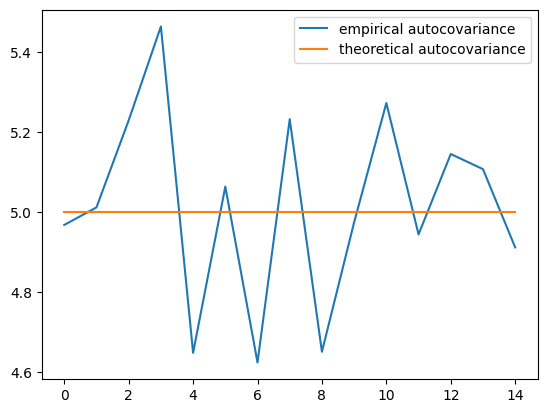

In [23]:
import matplotlib.pyplot as plt
plt.plot(emp_autocov_X)
plt.plot([autocov_Xt]*15)
plt.legend(["empirical autocovariance", "theoretical autocovariance"])
plt.show()

the empirical autocovariance [2.016678815590929, 2.1037575476738652, 1.9235069477322007, 2.0632170046144545, 2.095082798951828, 1.9586068804792087, 2.1737221817578933, 2.0708642784661166, 2.0795712291937263, 1.9913776219705384, 1.9680359960543408, 2.0398332136106743, 1.9516522992155165, 1.9970725684031259, 2.045152187433182]
the empirical autocovariance 2


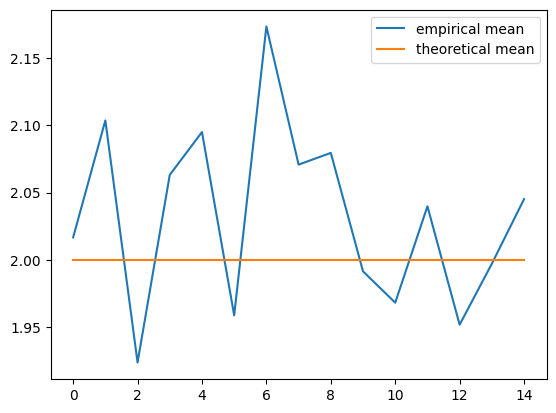

In [24]:
# Plot the theoretical operator and empirical estimators for various sampling many times and comment.
emp_mean_X = [ (1/T) * sum(X[i]) for i in range(15)]
plt.plot(emp_mean_X)
plt.plot([mean_Xt]*15)
print("the empirical autocovariance",emp_mean_X)
print("the empirical autocovariance",mean_Xt)
plt.legend(["empirical mean", "theoretical mean"])
plt.show()

     it's observed that empirical estimators tend to stay closely aligned with theoretical predictions. This alignment underscores the effectiveness of empirical approaches in approximating the underlying theoretical.

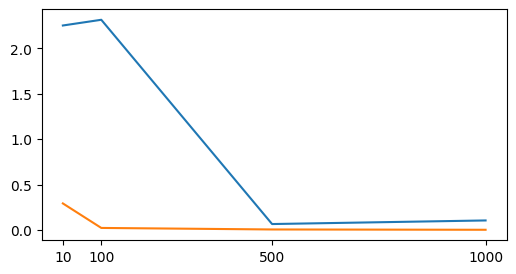

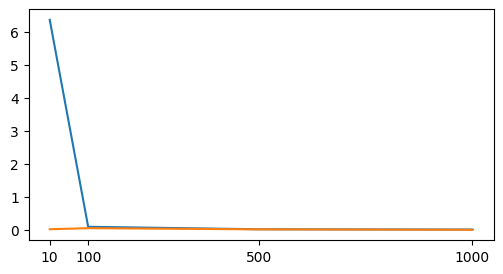

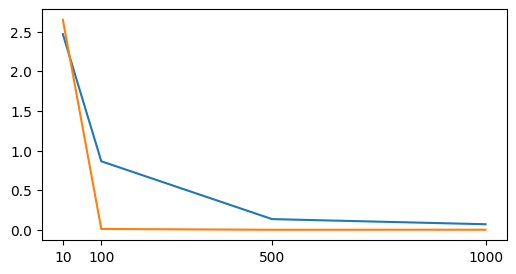

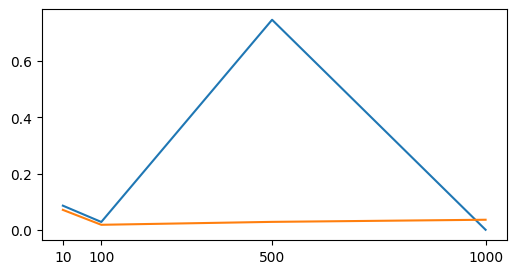

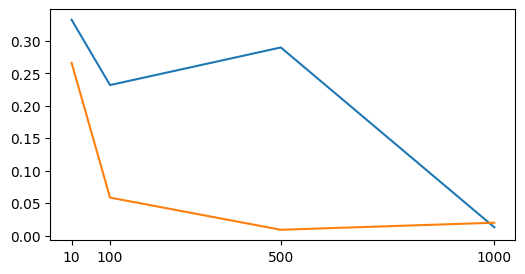

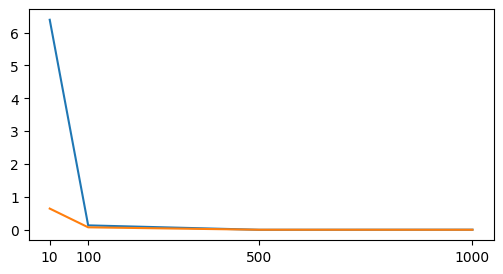

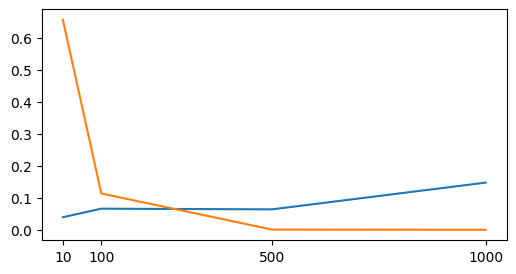

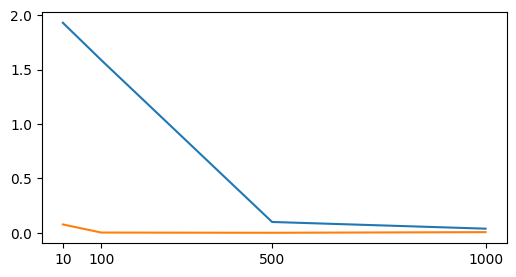

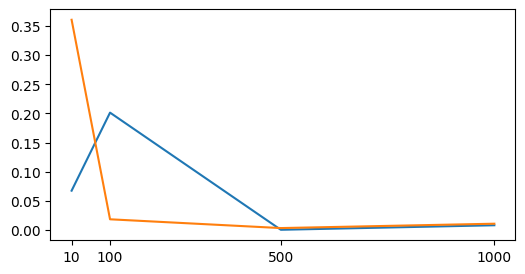

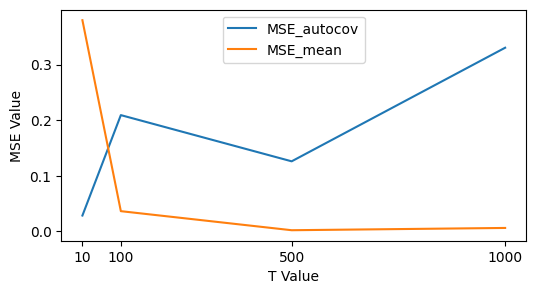

In [25]:
'''"The empirical mean and autocovariance converge to the theoretical mean and autocovariance as the number of samples increases."'''
 
i = 10  ## ''' Modifie i to see more results '''
for _ in range(i):
    results_mean = []
    results_autocov = []

    for k in [10, 100, 500, 1000]:
        Z_ = np.random.normal(mean_wn, sigma, k)
        X_ = np.zeros(k)
        for i in range(1, k):
            X_[i] = a + b * Z_[i] + Z_[i-1]
        
        emp_mean_X_ = (1/k) * sum(X_)
        emp_autocov_X_ = compute_emp_cov(X_,0,emp_mean_X_, k)
        results_mean += [emp_mean_X_]
        results_autocov += [emp_autocov_X_]

    # compute the mean squared error (MSE) between the theoretical and the empirical autocovariance function

    def MSE(emp, theo):
        return (emp - theo)**2
    
    MSE_autocov = [MSE(results_autocov[i], autocov_Xt) for i in range(4)]
    MSE_mean = [MSE(results_mean[i], mean_Xt) for i in range(4)]

    indices =  [10, 100, 500, 1000]

    plt.figure(figsize=(6, 3))

    plt.plot(indices, MSE_autocov, label='MSE_autocov')
    plt.plot(indices, MSE_mean, label='MSE_mean')
    plt.xticks(indices, indices)

plt.xlabel('T Value')
plt.ylabel('MSE Value')
plt.legend()
plt.show()

    The observed trend in the boxplots reveals a noteworthy pattern: as the sample size T increases, there is a consistent tendency for the Mean Squared Error (MSE) to approach and tend towards 0. This diminishing MSE indicates that, with larger sample sizes, the empirical autocovariance function converges more closely to the theoretical autocovariance function. The trend aligns with the expectation that increased data points contribute to a more accurate estimation, highlighting the reliability of the empirical approach as sample sizes grow. 

### $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")

In [26]:
K = 10 * n
a = random.uniform(0,1)
sample = 0 # capture time

def generate_X2(Z,i, T = 1000, K = 10 * n):
    X = np.zeros(T)
    for j in range(T):
        X[j]= a
        for k in range(K):
            if (j-k >= 0 and j-k < T):
                X[j] += (2**(-k)) * Z[j-k,i] 
            else:
                X[j] += 0
    return X

X2t = generate_X2(Z, sample)

In [27]:
theorical_mean_X2t = a # theoretical mean of X2

    For the autocovariance of X_t and X_{t+h}:

$\mathrm{Cov}(X_t, X_{t+h}) = \mathrm{Cov}(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a, \sum_{k=0}^{K}2^{-k}Z_{t+h-k} + a) = \mathrm{Cov}(\sum_{k=0}^{K}2^{-k}Z_{t+h-k}, \sum_{k=0}^{K}2^{-k}Z_{t-k})$

Using linearity of covariance and the fact that $\mathrm{Cov}(Z_t, Z_{t+h}) = 0$ for $h \neq 0$ (since $Z_t$ is white noise):

$\mathrm{Cov}(X_t, X_{t+h}) =\sum_{k=0}^{K} 2^{-2k} \mathrm{Cov}(Z_{t-k},Z_{t-k})$, so :

$\mathrm{Cov}(X_t, X_{t+h}) = \frac{(1 - \frac{1}{4}^K )}{1- \frac{1}{4}}\sigma = \frac{4}{3}(1 - (\frac{1}{4})^K )\sigma$ if $h = 0$ ( $\sigma$ is autocovariance of $Z_t$ with itself)

And $\mathrm{Cov}(X_t, X_{t+h}) = 0$ if $h \neq 0$

In [28]:
theorical_autocov_X2t = (4/3) * (1 - (1/4)**K) * sigma # theoretical autocovariance of X2

In [29]:
# empirical mean
emp_mean_X2t= (1/T) *  sum(X2t)

print("the empirical mean_X2 : ", emp_mean_X2t)
print("the theoretical mean_X2 : ", theorical_mean_X2t)

# empirical autocovariance
emp_autocov_X2t = compute_emp_cov( X2t, 0, emp_mean_X2t, T)
print("the empirical autocovariance",emp_autocov_X2t)
print("the theoretical autocovariance",theorical_autocov_X2t)

the empirical mean_X2 :  0.5809494103550238
the theoretical mean_X2 :  0.49026357765609774
the empirical autocovariance 1.269572263014143
the theoretical autocovariance 1.3333333333333333


In [30]:
# Plot the theoretical operator and empirical estimators for various sampling many times and comment.
list_X2 = []
for i in np.random.choice(n, 20):
    list_X2 += [generate_X2(Z,i)]
    
emp_autocov_X2 = [compute_emp_cov(list_X2[i],0,(1/T) *  sum(list_X2[i]), T) for i in range(20)]
print("the empirical autocovariance",emp_autocov_X2)
print("the theorical autocovariance",theorical_autocov_X2t)

the empirical autocovariance [1.3543334656330892, 1.5273716165327833, 1.3925081891766529, 1.2871680015953404, 1.3004720643887655, 1.5229446208913862, 1.3572918898220274, 1.3439325600174936, 1.3239390041511598, 1.3749382118172444, 1.45716959334847, 1.3949515768274445, 1.1385513035690082, 1.4804196423913993, 1.2457102502630204, 1.3653532152130627, 1.246501128388651, 1.453869694958214, 1.328326428142659, 1.39507634529179]
the theorical autocovariance 1.3333333333333333


[0.6209375251185715, 0.4377495553282078, 0.43956770192275335, 0.43207624122792915, 0.4285694374214466, 0.5689009890106185, 0.4476996552483881, 0.49211577578404436, 0.4164430454608201, 0.4458907903604668, 0.5324338419622382, 0.5677442396983973, 0.47399912883974965, 0.5698782898900359, 0.6316076576880941, 0.4953192787671917, 0.5764781285589234, 0.48170435529997296, 0.5339365983829777, 0.517162843660187]
0.49026357765609774


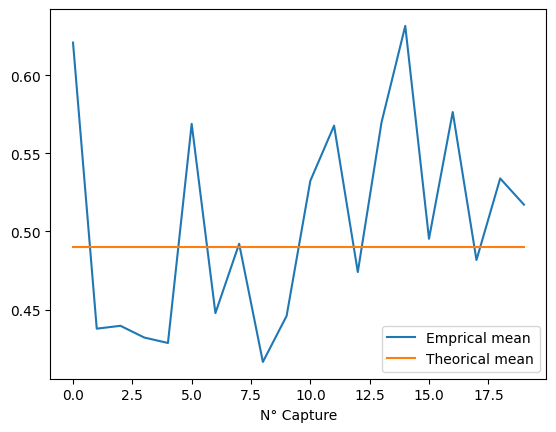

In [31]:
# Plot the theoretical operator and empirical estimators for various sampling many times and comment.
emp_mean_X2 = [ ((1/T) * sum(list_X2[i])) for i in range(20)]
print(emp_mean_X2)
print(theorical_mean_X2t)
plt.plot(emp_mean_X2, label="Emprical mean")
plt.plot([theorical_mean_X2t]*20, label="Theorical mean")
plt.xlabel("N° Capture")
plt.legend() 
plt.show()

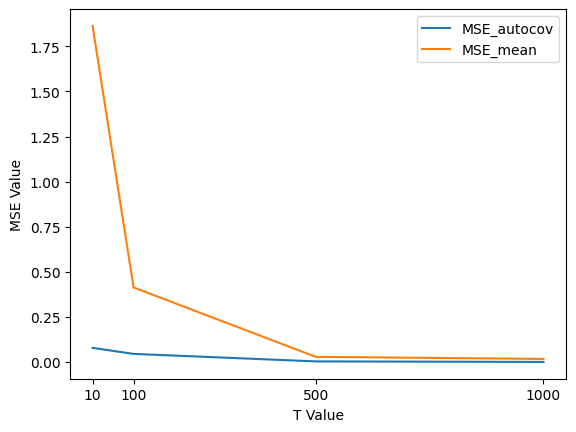

In [32]:
def mean_autocov(list_X,i = 0):
    # let's take the sample i
    X = list_X[i]
    results_mean = []
    results_autocov = []

    for k in [10, 100, 500, 1000]:
        X_ = X[:k]
        emp_mean_X = (1/k) * sum(X_)
        emp_autocov_X = compute_emp_cov(X_,0,emp_mean_X, k)

        results_mean += [emp_mean_X]
        results_autocov += [emp_autocov_X]
    return results_mean, results_autocov

results_mean, results_autocov = mean_autocov(list_X2)
MSE_autocov = [MSE(results_autocov[i], theorical_autocov_X2t) for i in range(4)]
MSE_mean = [MSE(results_mean[i], theorical_mean_X2t) for i in range(4)]

indices =  [10, 100, 500, 1000]


plt.plot(indices, MSE_autocov, label='MSE_autocov')
plt.plot(indices, MSE_mean, label='MSE_mean')
plt.xticks(indices, indices)

plt.xlabel('T Value')
plt.ylabel('MSE Value')
plt.legend()
plt.show()

Like the previous case we remark that MSE of the autocovariance and of the mean tends to zero, when We increase the number of samples.

### Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$

In [33]:
## Generating Psi_0 U([0,2pi])
Psi_0 = np.random.uniform(0, 2*np.pi, (T,n))
Psi_0.shape

(1000, 5000)

In [34]:
# Generating Harmonic process
'''
    Parameters:
    Psi_0 : The vector for which we want to compute the empirical autocovariance.
    Z : The white noise process.
    sample : The sample of the white noise process.
    A0 : The amplitude of the harmonic process.
    lambda0 : The frequency of the harmonic process.

    Returns:
    X : The Harmonic process.
'''
def generate_X3(Psi_0, Z, sample, A0, lambda0):
    X = np.zeros(T)
    for i in range(0, T):
        X[i] = A0 * np.cos(lambda0 * Psi_0[i, sample]) + Z[i, sample]
    return X

In [35]:
A0 = 2
lambda0=1
X3t = generate_X3(Psi_0, Z, 0, A0, lambda0)

    The esperance : 

$$ 
E[X_t] = E[A_0 \cos(\lambda_0 t + \Phi_0)] = A_0 \cos(\lambda_0 t) \quad \text{(si }\Phi_0 \sim \mathcal{U}([0, 2\pi]))
$$

    The autocovariance : 

$$
\begin{align*}
Cov(X_s, X_t) &= E[(A_0 \cos(\lambda_0 s + \Phi_0) + Z_s - A_0 \cos(\lambda_0 s + \Phi_0))(A_0 \cos(\lambda_0 t + \Phi_0) + Z_t - A_0 \cos(\lambda_0 t + \Phi_0))] \\
&= E[A_0^2 \cos(\lambda_0 s + \Phi_0) \cos(\lambda_0 t + \Phi_0)] \quad \text{(si }\Phi_0 \sim \mathcal{U}([0, 2\pi]))
\end{align*}

$$

In [36]:
# theoretical mean and autocovariance
theorical_mean_X3t = 0
theorical_autocov_X3t = (A0**2)/2 + sigma**2

In [37]:
emprical_mean_X3t = (1/T) * sum(X3t)
print("the empirical mean_X3 : ", emprical_mean_X3t)
print("the theoretical mean_X3 : ", theorical_mean_X3t)

# empirical autocovariance
emp_autocov_X3t = compute_emp_cov(X3t,0,emprical_mean_X3t, T)
print("the empirical autocovariance",emp_autocov_X3t)
print("the theoretical autocovariance",theorical_autocov_X3t)

the empirical mean_X3 :  0.0536724635092959
the theoretical mean_X3 :  0
the empirical autocovariance 3.040126532015299
the theoretical autocovariance 3.0


In [38]:
# Plot the theoretical operator and empirical estimators for various sampling many times and comment.

X3 = [generate_X3(Psi_0, Z, i, A0, lambda0) for i in np.random.choice(n, 15)]
emp_autocov_X3 = [compute_emp_cov(X3[i],0,emprical_mean_X3t, T) for i in range(15)]
print("the empirical autocovariance",emp_autocov_X3)
print("the empirical autocovariance",theorical_autocov_X3t)

the empirical autocovariance [2.9625421028358865, 2.9537527002759445, 3.062443025885059, 3.279952349189383, 3.0664928191637073, 2.965565091101497, 3.043201262487904, 2.9863200569275925, 2.737672931014694, 2.9355996805529974, 3.0929711948056426, 3.062896217537957, 3.0393394519568155, 2.9788434190993014, 2.949136714331454]
the empirical autocovariance 3.0


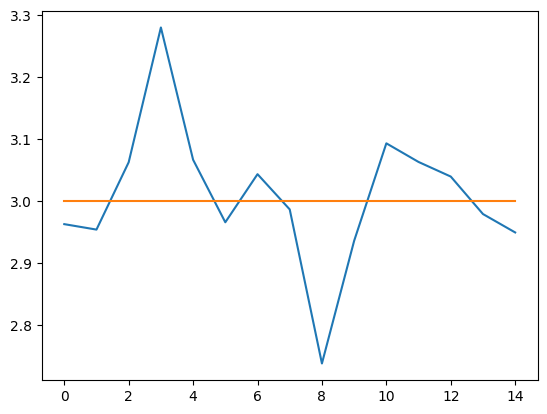

In [39]:
import matplotlib.pyplot as plt
plt.plot(emp_autocov_X3)
plt.plot([theorical_autocov_X3t]*15)
plt.show()

     We can say the same for all the random processes, it's observed that empirical estimators tend to stay closely aligned with theoretical mean and auto-covariance. This alignment underscores the effectiveness of empirical approaches in approximating the underlying theoretical mean and auto-covariance, adding to that in our particular case the data is robust and representative data, because it is generated by us without samples that are absurd. However, The consistency between empirical and theoretical outcomes enhances the reliability and practical applicability of the estimators in real-world scenarios.